Analyse connection between dropout and low predictions (intv 2 and 3)

In [2]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np
import statsmodels.formula.api as s

In [3]:
# load and group data
final = pickle.load(open("../00_data/final/dropout_per_session.pkl", "rb"))
df = pickle.load(open("../00_data/cleaned/predictions.pkl", "rb"))

intv2 = final[(final["interventiongroup"] == "2")]
intv3 = final[(final["interventiongroup"] == "3")]
intv = pd.concat([intv2, intv3])

df = df[["UebungsID", "prediction"]]
df = pd.merge(df, intv, on="UebungsID", how="left")
df = df.dropna()

c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
# correlations
print(np.corrcoef(df.dropout, df.prediction))

[[ 1.         -0.08869587]
 [-0.08869587  1.        ]]


[Text(0.5, 0, 'Dropout'), Text(0, 0.5, 'Prediction outcome')]

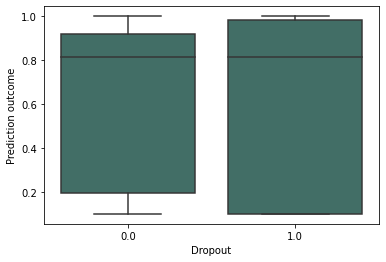

In [7]:
# plot dropout / prediction as boxplot
gr = sns.boxplot(data=df, x="dropout", y="prediction", showfliers=True, color="#3b756a")
gr.set(xlabel="Dropout", ylabel="Prediction outcome")